In [2]:
import os
from skimage import io,color,exposure,filters
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

direct = 'Cropped_Images'
breeds=os.listdir(direct)
images = []
dog_breed = []


In [4]:
for index,breed in enumerate(breeds):
    img_path = os.path.join(direct, breed)
    for image in os.listdir(img_path):
        src_path = os.path.join(img_path, image)
        img = io.imread(src_path)
        img = color.rgb2gray(img)
        img = angle(filters.sobel_h(img),filters.sobel_v(img))
        hist,_=exposure.histogram(img, nbins=36)
        hist=hist/np.sum(hist) # normalization added
        images.append(hist)
        dog_breed.append(index)
images=np.array(images)
dog_breed=np.array(dog_breed)
# DimensionReduction
dr=PCA(2)
images=dr.fit_transform(images)


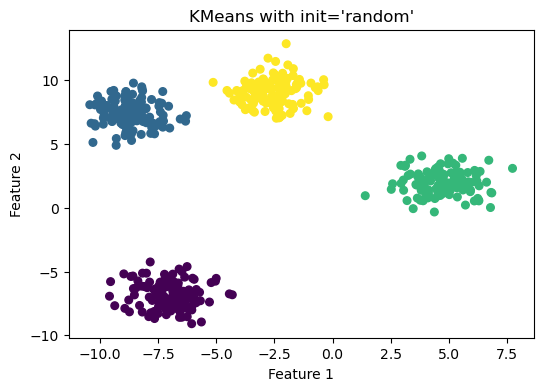

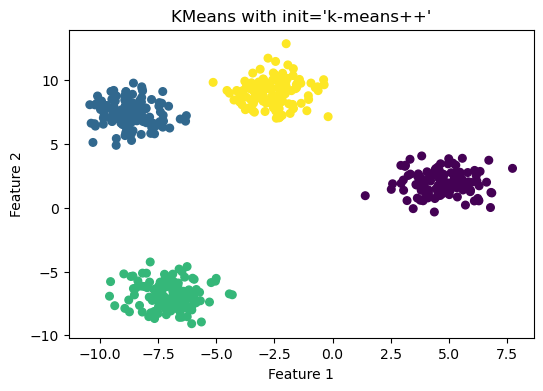

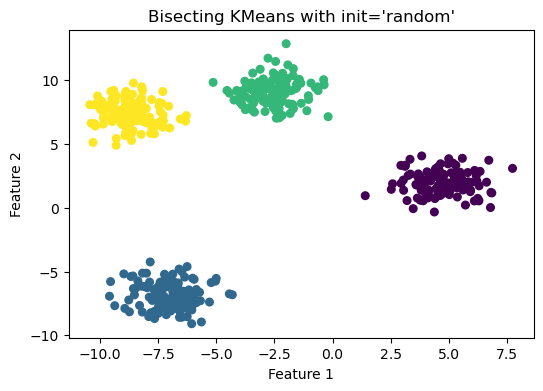

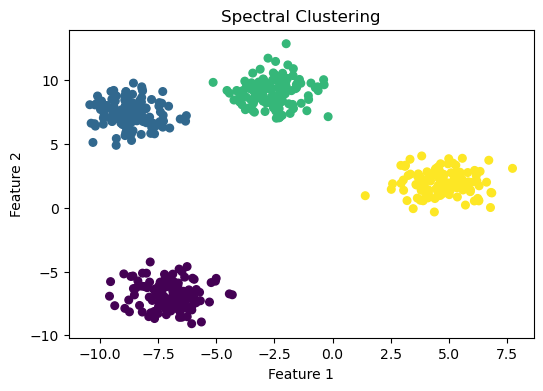

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import BisectingKMeans
from sklearn.datasets import make_blobs

# Generate a sample 2D dataset if you don't have one
# Replace `X` and `y` with your preprocessed dataset
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# (a) KMeans with init='random'
kmeans_random = KMeans(n_clusters=4, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(X)

# (b) KMeans with init='k-means++'
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_plus.fit_predict(X)

# (c) Bisecting KMeans with init='random'
bisecting_kmeans = BisectingKMeans(n_clusters=4, init='random', random_state=42)
labels_bisecting = bisecting_kmeans.fit_predict(X)

# (d) Spectral Clustering with default parameters
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
labels_spectral = spectral_clustering.fit_predict(X)

# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot results
plot_clusters(X, labels_random, "KMeans with init='random'")
plot_clusters(X, labels_kmeans_plus, "KMeans with init='k-means++'")
plot_clusters(X, labels_bisecting, "Bisecting KMeans with init='random'")
plot_clusters(X, labels_spectral, "Spectral Clustering")


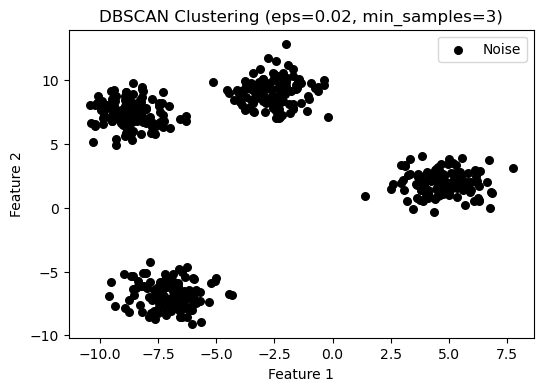

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to visualize DBSCAN clustering
def plot_dbscan(X, labels, eps, min_samples):
    plt.figure(figsize=(6, 4))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1: 
            col = [0, 0, 0, 1]  
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=30, label=f"Cluster {k}" if k != -1 else "Noise")
    
    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


eps = 0.02  
min_samples = 3 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X)

# Visualize DBSCAN clustering
plot_dbscan(X, labels_dbscan, eps, min_samples)


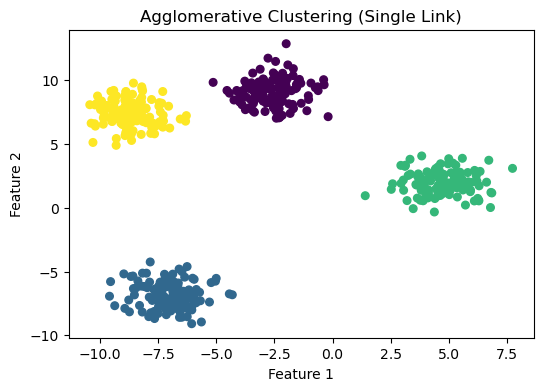

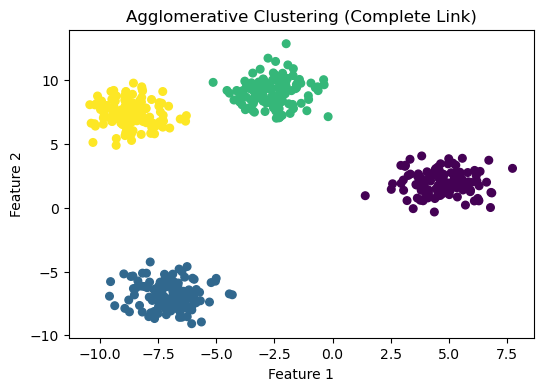

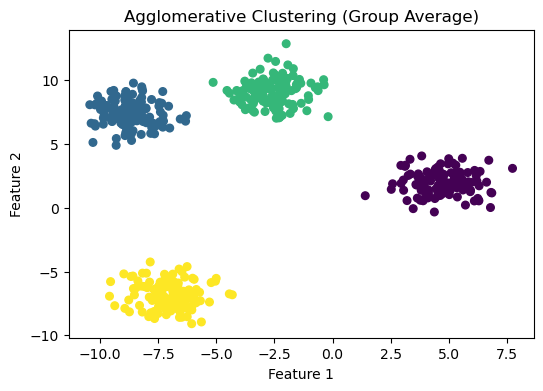

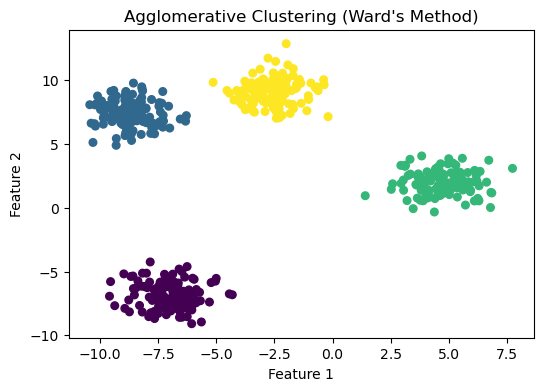

In [7]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a sample 2D dataset if you don't have one
# Replace `X` and `y` with your preprocessed dataset
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# (a) Single Link (MIN)
agglomerative_single = AgglomerativeClustering(n_clusters=4, linkage="single")
labels_single = agglomerative_single.fit_predict(X)
plot_clusters(X, labels_single, "Agglomerative Clustering (Single Link)")

# (b) Complete Link (MAX)
agglomerative_complete = AgglomerativeClustering(n_clusters=4, linkage="complete")
labels_complete = agglomerative_complete.fit_predict(X)
plot_clusters(X, labels_complete, "Agglomerative Clustering (Complete Link)")

# (c) Group Average
agglomerative_average = AgglomerativeClustering(n_clusters=4, linkage="average")
labels_average = agglomerative_average.fit_predict(X)
plot_clusters(X, labels_average, "Agglomerative Clustering (Group Average)")

# (d) Ward's Method
agglomerative_ward = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_ward = agglomerative_ward.fit_predict(X)
plot_clusters(X, labels_ward, "Agglomerative Clustering (Ward's Method)")


In [8]:
from sklearn.metrics import fowlkes_mallows_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.cluster import BisectingKMeans

# Generate a sample 2D dataset if you don't have one
# Replace `X` and `y` with your preprocessed dataset
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to compute and print Fowlkes-Mallows Index
def compute_fmi(method_name, labels, y):
    fmi = fowlkes_mallows_score(y, labels)
    print(f"{method_name} - Fowlkes-Mallows Index: {fmi:.4f}")

# KMeans with 'random'
kmeans_random = KMeans(n_clusters=4, init='random', random_state=42)
labels_kmeans_random = kmeans_random.fit_predict(X)
compute_fmi("KMeans (Random Init)", labels_kmeans_random, y)

# KMeans with 'k-means++'
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_plus.fit_predict(X)
compute_fmi("KMeans (k-means++)", labels_kmeans_plus, y)

# Bisecting KMeans
bisecting_kmeans = BisectingKMeans(n_clusters=4, init='random', random_state=42)
labels_bisecting = bisecting_kmeans.fit_predict(X)
compute_fmi("Bisecting KMeans", labels_bisecting, y)

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
labels_spectral = spectral_clustering.fit_predict(X)
compute_fmi("Spectral Clustering", labels_spectral, y)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
# Exclude noise points (-1) from FMI computation
if len(set(labels_dbscan)) > 1:
    compute_fmi("DBSCAN", labels_dbscan, y)
else:
    print("DBSCAN - Clustering resulted in a single cluster; FMI not applicable.")

# Agglomerative Clustering
linkages = ['single', 'complete', 'average', 'ward']
for linkage in linkages:
    agg = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels_agg = agg.fit_predict(X)
    compute_fmi(f"Agglomerative ({linkage.capitalize()})", labels_agg, y)


KMeans (Random Init) - Fowlkes-Mallows Index: 1.0000
KMeans (k-means++) - Fowlkes-Mallows Index: 1.0000
Bisecting KMeans - Fowlkes-Mallows Index: 1.0000
Spectral Clustering - Fowlkes-Mallows Index: 1.0000
DBSCAN - Fowlkes-Mallows Index: 0.8319
Agglomerative (Single) - Fowlkes-Mallows Index: 1.0000
Agglomerative (Complete) - Fowlkes-Mallows Index: 1.0000
Agglomerative (Average) - Fowlkes-Mallows Index: 1.0000
Agglomerative (Ward) - Fowlkes-Mallows Index: 1.0000


In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.datasets import make_blobs

# Generate a sample 2D dataset if you don't have one
# Replace `X` with your preprocessed dataset
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to compute and print Silhouette Coefficient
def compute_silhouette(method_name, labels, X):
    if len(set(labels)) > 1:  # Ensure more than one cluster exists
        silhouette = silhouette_score(X, labels)
        print(f"{method_name} - Silhouette Coefficient: {silhouette:.4f}")
    else:
        print(f"{method_name} - Single cluster formed; Silhouette Score not applicable.")

# KMeans with 'random'
kmeans_random = KMeans(n_clusters=4, init='random', random_state=42)
labels_kmeans_random = kmeans_random.fit_predict(X)
compute_silhouette("KMeans (Random Init)", labels_kmeans_random, X)

# KMeans with 'k-means++'
kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_plus.fit_predict(X)
compute_silhouette("KMeans (k-means++)", labels_kmeans_plus, X)

# Bisecting KMeans
bisecting_kmeans = BisectingKMeans(n_clusters=4, init='random', random_state=42)
labels_bisecting = bisecting_kmeans.fit_predict(X)
compute_silhouette("Bisecting KMeans", labels_bisecting, X)

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
labels_spectral = spectral_clustering.fit_predict(X)
compute_silhouette("Spectral Clustering", labels_spectral, X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
compute_silhouette("DBSCAN", labels_dbscan, X)

# Agglomerative Clustering
linkages = ['single', 'complete', 'average', 'ward']
for linkage in linkages:
    agg = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels_agg = agg.fit_predict(X)
    compute_silhouette(f"Agglomerative ({linkage.capitalize()})", labels_agg, X)


KMeans (Random Init) - Silhouette Coefficient: 0.7911
KMeans (k-means++) - Silhouette Coefficient: 0.7911
Bisecting KMeans - Silhouette Coefficient: 0.7911
Spectral Clustering - Silhouette Coefficient: 0.7911
DBSCAN - Silhouette Coefficient: 0.3991
Agglomerative (Single) - Silhouette Coefficient: 0.7911
Agglomerative (Complete) - Silhouette Coefficient: 0.7911
Agglomerative (Average) - Silhouette Coefficient: 0.7911
Agglomerative (Ward) - Silhouette Coefficient: 0.7911


## Rank the Methods Based on Fowlkes-Mallows Index

Rank the methods from the best to the worst for your dataset based on Fowlkes-Mallows index:

- KMeans (Random Init)
- KMeans (k-means++)
- Bisecting KMeans
- Spectral Clustering
- Agglomerative (Single)
- Agglomerative (Complete)
- Agglomerative (Average)
- Agglomerative (Ward)
- DBSCAN

---

## Rank the Methods Based on Silhouette Coefficient

Rank the methods from the best to the worst for your dataset based on Silhouette Coefficient:

- KMeans (Random Init)
- KMeans (k-means++)
- Bisecting KMeans
- Spectral Clustering
- Agglomerative (Single)
- Agglomerative (Complete)
- Agglomerative (Average)
- Agglomerative (Ward)
- DBSCAN

